# Sampling Statistics - Lab

## Introduction

Typically we don't know statistics about a population itself; the only way to know these for sure would be to survey the entirety of the population which is typically impractical. For example, to know the true salary mean of individuals in the United States, we would have to survey each and every individual.

In lieu of being able to know the true underlying population statistics, we estimate them. Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. 

The average of a sample is known as the sample mean. Sampling distribution can be thought of as relative frequency distribution with a large number of samples. A relative frequency distribution tends to approach the sampling distribution as number of samples increase.

## Objectives
You will be able to:

* Calculate and interpret standard error

## Background and Terminologies 

In order to learn the **population mean**, we dont measure the whole population. Instead, we take a random sample and use **sample mean, ( x_bar or $\bar{x}$ )** to estimate population mean **( mu or μ )**. The sample mean is usually not exactly the same as the population mean and depends upon the values of samples chosen, however the population mean remains fixed. While using **sample mean** to estimate population mean, we come across **sampling error**, which directly relates to the **standard deviation** of a sampling statistic (e.g. mean values). This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population.

Let's learn about these concepts through an example.

>**Pumpkin Weights**
>The population is the weight of six pumpkins (in pounds) displayed in a carnival "guess the weight" game booth. You are asked to guess the average weight of the six pumpkins by picking two pumpkins at a time randomly untill all pumpkins have been used.

| Pumpkin | Weight (in pounds) |
|---------|--------------------|
| A       |       19           |
| B       |       14           |
| C       |       15           |
| D       |       9            |
| E       |       10           |
| F       |       17           |

## Step 1

Lets calculate the population mean first, which we calculate as:

**μ = sum of all elements / N** (where N is population size)

In [2]:
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

Create two lists with pumpkin name and respective pumpkin weights. COmbine the lists to create a pumpkin directory with name as keys and weights as values. 

In [3]:
# Create two lists with pumpkin names and weights

pumpkin = ['A','B','C','D','E','F']
weights = [19,14,15,9,10,17]

# Combine both lists to create a dictionary

pumpkin_dict = dict(zip(pumpkin,weights))

print (pumpkin_dict)

#{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


Now lets try to calculate the mean of the pumpkin population and also visualise the weight distribution. 

In [4]:
# Calculate the population mean from pumpkin_dict


def calculate_mu(x):

    # USe the formula for mu given above
    d = np.mean(list(x.values()))

    return (d)   

mu = calculate_mu(pumpkin_dict)
mu

# 14.0

14.0

That was pretty a straightforward exercise. Let's use the data we have so far to visualise the weights of individual pumpkins and mean weight. 

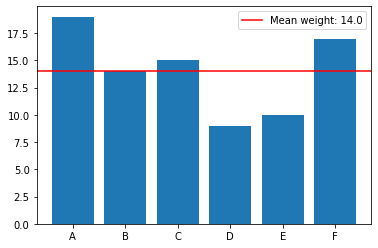

In [5]:
# Plot a bar graph showing weights of pumpkins and highlight the mean weight
plt.bar(pumpkin_dict.keys(),pumpkin_dict.values())
plt.axhline(y=mu, color='r', linestyle='-', 
            label = "Mean weight: " + str(mu))
plt.legend()
plt.show()



We can see only one pumpkin has weight which is equal to mean weight (B:14). Let's try to simulate the random sampling process as stated below. 

## Step 2 : Calculate mean of samples

From the `pumpkin_dict`, we can now obtain the sampling distributions of the sample mean for a given sample size. We'll do this while sampling without replacement (to reflect the idea that one can have two pumpkins at a given time, and will be taken out of population once used). 

Let's also try to make the code more flexible to allow sampling any number of pumpkins from the population, to study the effect of sample size on sample mean. 

To achieve this, first we need to identify all the possible combinations that can be observed by choosing 2 pumpkins from the population, following the game rule.

In [8]:
# Identify a sample size n 
n = 2 

# Use itertools.combinations() to generate and print a list of combinations
combs = list(itertools.combinations(pumpkin_dict,n))
print(combs)

# Using 2 samples, we can see 15 possible combinations as below:
# [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), 
#  ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), 
#  ('E', 'F')]


[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


Great. We can now generate any number of combinations from the population (try changing the value of n above). Next step in the process is to calculate the mean of all possible combinations and study weather these means differes from the population mean, and whether sample size has any effect towards estimating population mean. 

Lets write a function which would include the code for generating combinations as above and also identifying mean for each sample. 

In [25]:

def sample_means(sample_size, data):

    """
    This function takes in population data as a dictionary along with a chosen sample size 
    to generate all possible combinations of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations ( as tuples ) 
    b) a list of means for all sample
    """

    n = sample_size

    # Calculate the mean of population
    mu = calculate_mu(data)
    print("Mean of populations is: ",mu)
    #print ("Mean of population is:", mu)

    # Generate all possible combinations using given sample size
    combs = list(itertools.combinations(data,n))

    # Calculate the mean weight (x_bar) for all the combinations (samples) using the given data

    x_bar_list = [np.mean([data[p] for p in tuples]) for tuples in combs]

    # Calculate sample mean for all combinations and append to x_bar_list
 

    return combs, x_bar_list

n = 2 #Sample size

combs, means = sample_means(n, pumpkin_dict)

# Print the sample combinations with their means

for i in range(len(combs)):
    print(combs[i][0], combs[i][1], means[i])


# Using 2 samples, we can see 15 possible combinations as below:
# The mean of all sample means mu_x_hat is: 14.0
# ('A', 'B') 16.5
# ('A', 'C') 17.0
# ('A', 'D') 14.0
# ('A', 'E') 14.5
# ('A', 'F') 18.0
# ('B', 'C') 14.5
# ('B', 'D') 11.5
# ('B', 'E') 12.0
# ('B', 'F') 15.5
# ('C', 'D') 12.0
# ('C', 'E') 12.5
# ('C', 'F') 16.0
# ('D', 'E') 9.5
# ('D', 'F') 13.0
# ('E', 'F') 13.5
# The mean of all sample means mu_x_hat is: 14.0

Mean of populations is:  14.0
A B 16.5
A C 17.0
A D 14.0
A E 14.5
A F 18.0
B C 14.5
B D 11.5
B E 12.0
B F 15.5
C D 12.0
C E 12.5
C F 16.0
D E 9.5
D F 13.0
E F 13.5


Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words, 
>If one does the experiment over and over again, the overall average of the sample mean is exactly the population mean.

In the output above, we can see that some mean values i.e. 14.5, 12, are being repeated in the combinations. We can develop a frequency table identify the probability of seeing different mean value. 

In [39]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    #Calculate the frequency of each mean value
    freq = {}
    for mean in means:
        freq[mean] = means.count(mean)

    prob = {key: value / len(means) for key, value in freq.items()}


    # Calculate and append fequency of each mean value in the prob list. 

    return prob
    
probs = calculate_probability(means)

# Print combinations with sample means and probability of each mean value
for i in range(len(combs)):
    print(combs[i][0], combs[i][1], means[i], probs[means[i]])


# ('A', 'B') 16.5 1/15
# ('A', 'C') 17.0 1/15
# ('A', 'D') 14.0 1/15
# ('A', 'E') 14.5 2/15
# ('A', 'F') 18.0 1/15
# ('B', 'C') 14.5 2/15
# ('B', 'D') 11.5 1/15
# ('B', 'E') 12.0 2/15
# ('B', 'F') 15.5 1/15
# ('C', 'D') 12.0 2/15
# ('C', 'E') 12.5 1/15
# ('C', 'F') 16.0 1/15
# ('D', 'E') 9.5 1/15
# ('D', 'F') 13.0 1/15
# ('E', 'F') 13.5 1/15


A B 16.5 0.06666666666666667
A C 17.0 0.06666666666666667
A D 14.0 0.06666666666666667
A E 14.5 0.13333333333333333
A F 18.0 0.06666666666666667
B C 14.5 0.13333333333333333
B D 11.5 0.06666666666666667
B E 12.0 0.13333333333333333
B F 15.5 0.06666666666666667
C D 12.0 0.13333333333333333
C E 12.5 0.06666666666666667
C F 16.0 0.06666666666666667
D E 9.5 0.06666666666666667
D F 13.0 0.06666666666666667
E F 13.5 0.06666666666666667


Here we see that the chance that the sample mean is exactly the population mean (i.e. 14) is only 1 in 15 (row 3), very small. It may also happen that the sample mean can never be the same value as the population mean. 

 The difference between sample mean and population mean is known as known as **Sampling Error**.  

>When using the sample mean to estimate the population mean, some possible error will be involved since random sample mean is also random.

## Sample size and sampling error: 

Sample means cluster more closely around the population mean as the sample size increases. Thus, possible sampling error decreases as sample size increases.

Let's repeat above exercise while increasing the sample size from 2 to 5. 

In [41]:
n = 5

combs, means = sample_means(n, pumpkin_dict)

probs = calculate_probability(means)
for i in range(len(combs)):
    print(combs[i][0], combs[i][1], means[i], probs[means[i]])
# Use above functions to generate combinations as samples with means and calculate the probability of seeing
# each mean value  with sample size = 5.

# Using 5 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0
# 1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
# 2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
# 3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
# 4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
# 5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
# 6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


Mean of populations is:  14.0
A B 13.4 0.16666666666666666
A B 14.8 0.16666666666666666
A B 15.0 0.16666666666666666
A B 13.8 0.16666666666666666
A C 14.0 0.16666666666666666
B C 13.0 0.16666666666666666


Again, we see that using sample mean to estimate population mean involves sampling error. Sample means do not fully agree with population mean. The mean of sample means, however, is still 14. 

In order to fully appreciate the impact of sample size on estimating population mean, let's try to visualize sample means and how the spread of values change when changing sample size. 

In a loop, run the above experiment with sample sizes ranging from 1 to 5 and measure and visualise the spread of values around population mean. 

Mean of populations is:  14.0
Mean of populations is:  14.0
Mean of populations is:  14.0
Mean of populations is:  14.0
Mean of populations is:  14.0


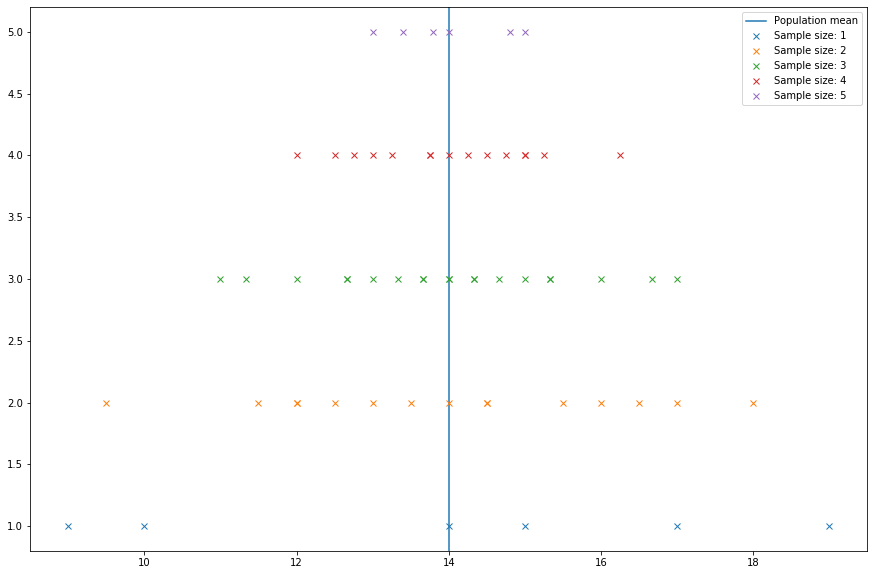

In [46]:
# Run a for loop to execute above code for sample size 1 to 5 and visualise the spread of sample 
# means

plt.figure(figsize=(15,10))

plt.axvline(x=mu, label = "Population mean")

for n in range(1,6):

    combs, means = sample_means(n, pumpkin_dict)

    probs = calculate_probability(means)
    val = n # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(10) # just as an example array
    plt.plot(means, np.zeros_like(means) + val, 'x', label =("Sample size: "+ str(n)))
    plt.legend()


plt.show()

# Using 1 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 2 samples with a population of size, we can see 15 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 3 samples with a population of size, we can see 20 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 4 samples with a population of size, we can see 15 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 5 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

Here can see that with increasing sample size, the **spread** of sample means is reducing and sample mean values tend to come closer to population mean. 

## Step 3: Calculate the standard error

### So what is standard error ?

The **_Standard Error (SE)_** is very similar to standard deviation. Both are measures of spread. The higher the number, the more spread out your data is. To put it simply, the two terms are essentially equal — but there is one important difference. While the standard error uses statistics (sample data) standard deviations use parameters (population data). We achieve this dividing the standard deviation by the square root ofthe sample size.

The calculation for the standard error of the sample mean is:

## $$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$$

Here, $\sigma$ is the population standard deviation (which we will approximate with the sample standard deviation) and $n$ is the sample size.

Lets run above block of code again and calculate standard error according to chosen sample size

Mean of populations is:  14.0
Mean of populations is:  14.0
Mean of populations is:  14.0
Mean of populations is:  14.0
Mean of populations is:  14.0


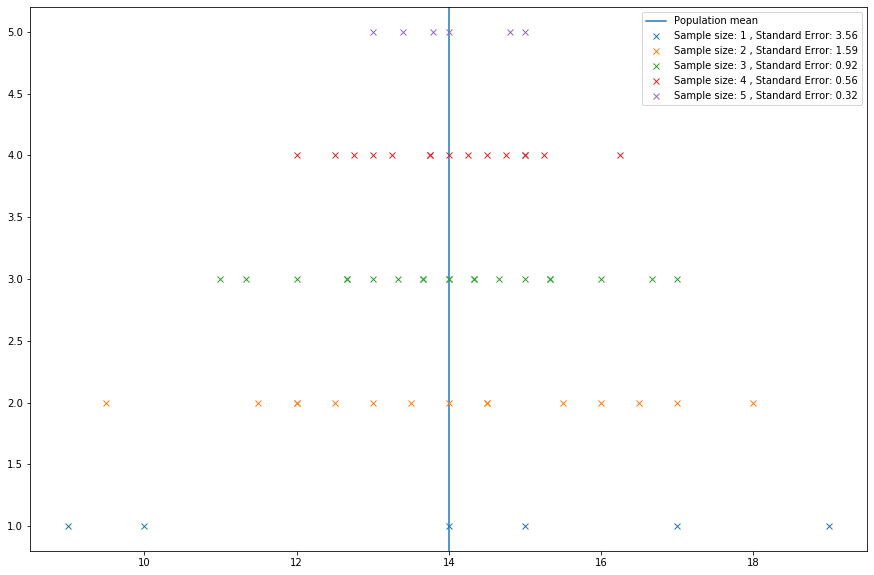

In [47]:
# Create empty lists for storing sample means, combinations and standard error for each iteration
means_list = []
combs_list = []
err_list = []
# Create a for loop with changing sample sizes
plt.figure(figsize=(15,10))

plt.axvline(x=mu, label = "Population mean")

for n in range(1,6):

    combs, means = sample_means(n, pumpkin_dict)

    probs = calculate_probability(means)
    means_list.append(means)
    combs_list.append(combs)
    err = round(np.std(means)/np.sqrt(n), 2)
    
    val = n # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(10) # just as an example array
    plt.plot(means, np.zeros_like(means) + val, 'x', label ="Sample size: "+ str(n) + " , Standard Error: "+ str(err) )
    plt.legend()
plt.show()

    
    
    # Calculate combinations, means as earlier, append to relevant lists

    

    # Calculate and append the standard error by dividing sample means with square root of sample size

    

    # Visualize sample spread and standard error values for each sample

Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words, if one does the experiment over and over again, the overall average of the sample mean is exactly the population mean. If the sample size is increased, the standard error is reduced. 

According to **Central Limit Theorem**, for a large sample size, `x_hat` is approximately normally distributed, regardless of the distribution of the population one samples from

## Summary

In this lab we saw how sampling statistics relate to population statistics. In order to estimate a population parameter (i.e. mean) with a high level of accuracy, We must reduce the spread or the sample error which is simply the standard deviation of the samples from the sample mean. The size of samples must be set carefully in order to avoid excessive values for standard error to gain a high level of confidence in our population estimates. 